In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
import numpy as np
from math import sqrt
from shapleycomposition import ShapleyExplainer
from composition_stats import ilr, ilr_inv, sbp_basis, inner
from bifurc_tree import create_tree_from_sbp, init_graph, build_graph
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import shap

shap.initjs()

In [2]:
import os

out_dir = os.path.join('figures', 'shap', '3classes')
os.makedirs(out_dir, exist_ok=True)

In [3]:
K = 13         #index of the instance you want to test in the test set
N_class = 3    #number of class, the dimension of the simplex is therefore N_class-1


#load the dataset and split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    *shap.datasets.iris(), test_size=0.2, random_state=0
)

In [4]:
#from sklearn.preprocessing import normalize
#fig = plt.figure()
#plt.scatter(X[:,0], X[:,1])
#X = normalize(X, axis=0)
#fig = plt.figure()
#plt.scatter(X[:,0], X[:,1])

In [5]:
#train an SVM classifier
svc_linear = svm.SVC(kernel='rbf', probability=True)
svc_linear.fit(X_train, Y_train)

SVC(probability=True)

In [6]:
svc_linear.predict_proba(X_test[:2])

array([[0.00913167, 0.03110939, 0.95975894],
       [0.01004094, 0.98072278, 0.00923628]])

In [7]:
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0, :])

i=2
shap.force_plot(explainer.expected_value[i], shap_values[i], X_test.iloc[0, :])

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [8]:
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
shap.plots.waterfall(explainer)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

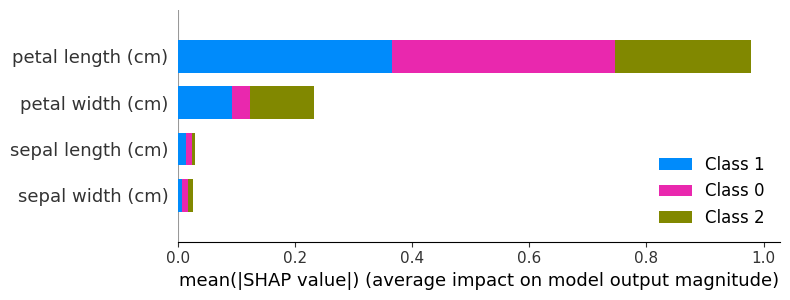

In [10]:
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test,approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Direct copy of example XGBoost Multi-class Example

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time
import xgboost

X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)

shap.initjs()

In [15]:
model = xgboost.XGBClassifier(objective="binary:logistic", max_depth=4, n_estimators=10)
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

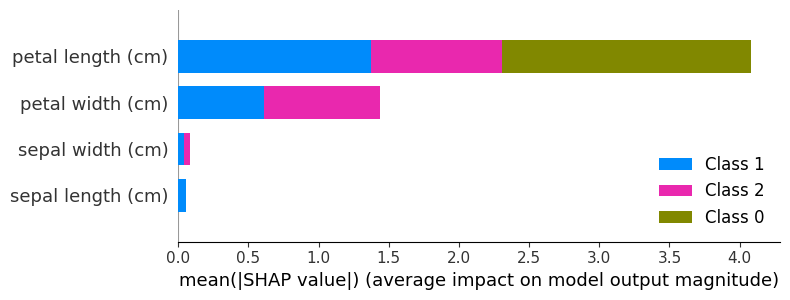

In [16]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_values, X_test)